In [1]:
import numpy as np
import seaborn as sns
#import h5py
import pandas as pd
# import datetime
# import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


In [11]:
 ls Atqasuk/

layers  1  1.dat          water_temp  1  1.dat
soil_temp  1  1.dat       water_temp  1  1.dat.txt


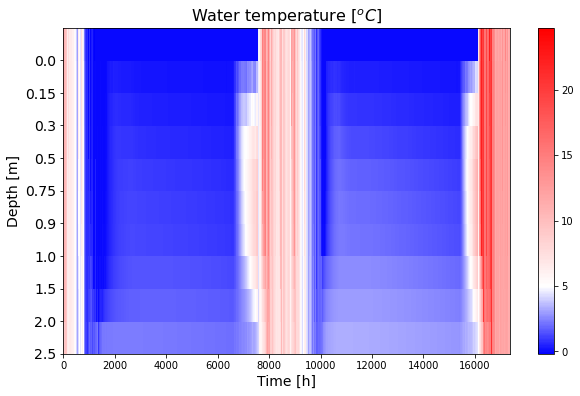

In [7]:
m=np.loadtxt(u"Atqasuk/water_temp  1  1.dat",skiprows=6)
[nx,ny]=np.shape(m)
nyy=int((ny-6)/2)
wdepth=[]
wtemps=[]
for i in range(nyy+1):
    wdepth.append(m[0,5+2*i])
    wtemps.append(m[:,6+2*i])

wtemps=np.array(wtemps)
fstemps=wtemps.flatten()

levels=np.linspace(-4,25,21)

#plotting coutour plot of the water temperatures
fig, ax = plt.subplots(figsize=(10, 6))
#nn=np.normalize(np.flipud(wtemps))
# cntr1 = ax.contourf(np.flipud(wtemps),levels,norm=MidpointNormalize(midpoint=0),cmap="bwr")
    
cntr1=ax.pcolor(np.flipud(wtemps),norm=MidpointNormalize(midpoint=5),cmap="bwr")   # Set midpoint as 0
plt.colorbar(cntr1, ax=ax) # To extend colorbar in the min values

# setting ticks for the countour plot
plt.title('Water temperature [$^oC$]', fontsize=16);
plt.xlabel('Time [h]',fontsize=14)
plt.ylabel('Depth [m]',fontsize=14)
yticks = np.arange(len(wdepth)-1,-1,-1)
ax.set_yticks(yticks)
ax.set_yticklabels(wdepth, fontsize=14);


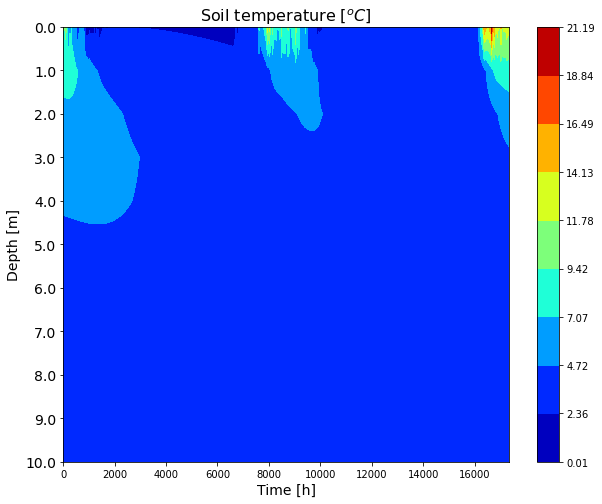

In [10]:
m=np.loadtxt(u"Atqasuk/soil_temp  1  1.dat",skiprows=6)
[nx, ny] = np.shape(m)
nyy = int((ny - 6) / 2)

sdepth = []
stemps = []
for i in range(nyy + 1):
    sdepth.append(m[0, 5 + 2 * i])
    stemps.append(m[:, 6 + 2 * i])

stemps = np.array(stemps)
ftemps = stemps.flatten()
levels = np.linspace(min(ftemps), max(ftemps), 10)

fig, ax = plt.subplots(figsize=(10, 8))
cntr1 = ax.contourf(np.flipud(stemps), levels, cmap="jet")

fig.colorbar(cntr1, ax=ax)

plt.title('Soil temperature [$^oC$]', fontsize=16)
plt.xlabel('Time [h]', fontsize=14)
plt.ylabel('Depth [m]', fontsize=14)
yticks = np.arange(len(sdepth) - 1, -1, -1)
ax.set_yticks(yticks)
ax.set_yticklabels(sdepth, fontsize=14)

plt.show()


In [148]:
def plot_snow_ice(fdir):
    fig, ax = plt.subplots(figsize=(7, 5))
    m=np.loadtxt(u"results/"+fdir+"/time_series/layers  1  1.dat",skiprows=19)
    plt.plot(m[:,14],linewidth=2) 
    plt.plot(m[:,15],linewidth=2)
    plt.legend(['ice','snow'],fontsize=18);
    plt.title('snow and ice layers thickness',fontsize=14)
    plt.xlabel('Time [h]',fontsize=14)
    plt.ylabel('Depth [m]',fontsize=14)
plot_snow_ice()

TypeError: plot_snow_ice() missing 1 required positional argument: 'fdir'

In [85]:
 df_met =pd.read_csv(u'../../validation data/Atqasuk_LakeTemp.csv', encoding = "ISO-8859-1")
 df_met.head()   

,DateTime,Depth,Temp_C
0,2012-04-13 00:00:00,0.3,0.273
1,2012-04-13 01:00:00,0.3,0.273
2,2012-04-13 02:00:00,0.3,0.246
3,2012-04-13 03:00:00,0.3,0.246
4,2012-04-13 04:00:00,0.3,0.273


<AxesSubplot:xlabel='DateTime', ylabel='Temp_C'>

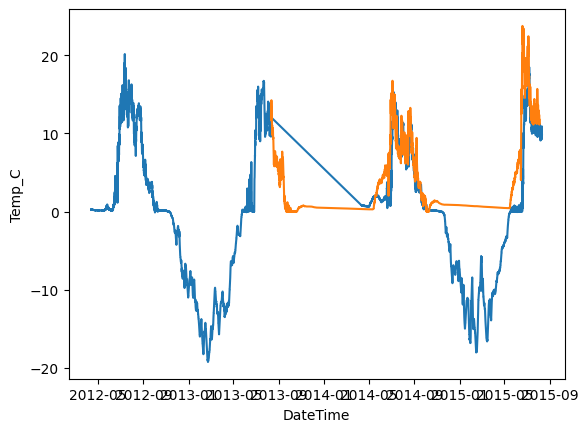

In [160]:
Atgasuk_meas= pd.read_csv(u'../../validation data/Atqasuk_LakeTemp.csv', encoding = "ISO-8859-1")
Atgasuk_meas['DateTime'] = pd.to_datetime(Atgasuk_meas['DateTime'])
Atgasuk_30cm = Atgasuk_meas[Atgasuk_meas['Depth']==0.3]#isolate the depths
Atgasuk_calc=pd.read_csv(u"../../model output/Atqasuk/water_temp  1  1.dat",encoding = 'unicode_escape',skiprows = 6,delim_whitespace=True,header=None)
Atgasuk_calc = Atgasuk_calc.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
Atgasuk_calc.columns = ["Year","Month","Day","Hour","Starting time","0 m","0.15 m","0.3 m","0.5 m","0.75 m","0.9 m","1.00 m","1.5 m","2.0 m","2.5 m"]
Atgasuk_calc['datetime'] = pd.to_datetime(dict(year=Atgasuk_calc['Year'], month=Atgasuk_calc['Month'], day=Atgasuk_calc['Day'], hour=Atgasuk_calc['Hour']))
Atgasuk_calc = Atgasuk_calc.drop(columns=["Year","Month","Day","Hour","Starting time"])
Atgasuk_calc.head()

sns.lineplot(data = Atgasuk_30cm,x = "DateTime",y = "Temp_C")
sns.lineplot(data = Atgasuk_calc,x = "datetime",y = "0.3 m")




In [60]:
Atgasuk_meas= pd.read_csv(u'../../validation data/Atqasuk_LakeTemp.csv', encoding = "ISO-8859-1")
Atgasuk_meas['DateTime'] = pd.to_datetime(Atgasuk_meas['DateTime'])
Atgasuk_meas.head()
Atgasuk_50cm = Atgasuk_meas[Atgasuk_meas['Depth']==3.25]#isolate the depths
Atgasuk_calc=pd.read_csv(u"../../model output/Atqasuk/water_temp  1  1.dat",encoding = 'unicode_escape',skiprows = 6,delim_whitespace=True,header=None)
Atgasuk_calc = Atgasuk_calc.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
Atgasuk_calc.columns = ["Year","Month","Day","Hour","Starting time","0 m","0.15 m","0.3 m","0.5 m","0.75 m","0.9 m","1.00 m","1.5 m","2.0 m","2.5 m"]
Atgasuk_calc['datetime'] = pd.to_datetime(dict(year=Atgasuk_calc['Year'], month=Atgasuk_calc['Month'], day=Atgasuk_calc['Day'], hour=Atgasuk_calc['Hour']))
Atgasuk_calc = Atgasuk_calc.drop(columns=["Year","Month","Day","Hour","Starting time"])
Atgasuk_calc.head()
Atgasuk_meas.head()

sns.lineplot(data = Atgasuk_50cm,x = "DateTime",y = "Temp_C")
sns.lineplot(data = Atgasuk_calc,x = "datetime",y = "0.5 m")

,DateTime,Depth,Temp_C
0,2012-04-13 00:00:00,0.3,0.273
1,2012-04-13 01:00:00,0.3,0.273
2,2012-04-13 02:00:00,0.3,0.246
3,2012-04-13 03:00:00,0.3,0.246
4,2012-04-13 04:00:00,0.3,0.273


In [38]:
m = pd.read_csv(u"../../model output/Atqasuk/layers  1  1.dat", skiprows=19)
m.head()


,2013 8 10 13.0056 97.0000 2.5000 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000 0.0000 0.0000 0.3009E+07 0.0
0,2013 8 10 14.0056 98.0000...
1,2013 8 10 15.0056 99.0000...
2,2013 8 10 16.0056 100.0000...
3,2013 8 10 17.0056 101.0000...
4,2013 8 10 18.0056 102.0000...


<AxesSubplot:xlabel='DateTime', ylabel='Temp_C'>

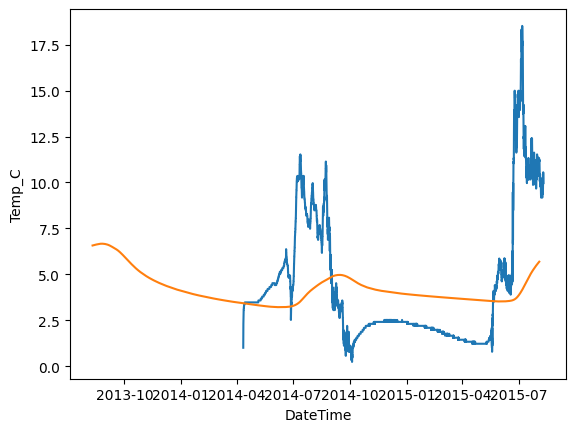

In [160]:
Atgasuk_meas= pd.read_csv(u'../../validation data/Atqasuk_LakeTemp.csv', encoding = "ISO-8859-1")
Atgasuk_meas['DateTime'] = pd.to_datetime(Atgasuk_meas['DateTime'])
Atgasuk_calc = pd.read_csv(u"../../model output/Atqasuk/soil_temp  1  1.dat", encoding='unicode_escape', skiprows=6, delim_whitespace=True, header=None)
Atgasuk_calc = Atgasuk_calc.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
Atgasuk_calc.columns = ["Year", "Month", "Day", "Hour", "Starting time","Date", "0.00", "1.00", "2.00", "3.00", "4.00", "5.00", "6.00", "7.00", "8.00", "9.00","10.00"]
Atgasuk_calc['datetime'] = pd.to_datetime(dict(year=Atgasuk_calc['Year'], month=Atgasuk_calc['Month'], day=Atgasuk_calc['Day'], hour=Atgasuk_calc['Hour']))
Atgasuk_calc = Atgasuk_calc.drop(columns=["Year", "Month", "Day", "Hour", "Starting time","Date"])
Atgasuk_calc.head()
sns.lineplot(data = Atgasuk_50cm,x = "DateTime",y = "Temp_C")
sns.lineplot(data = Atgasuk_calc,x = "datetime",y = "1.00")

In [151]:
def plot_parameters(param):    
    m = pd.read_csv(u"../../model output/Atqasuk/layers  1  1.dat", skiprows=19,delim_whitespace = True,header = None)
    m.columns = ["year","month","day","hour","starting time","water layer thickness","W mixed layer thickness","E mixed layer thickness","S mixed layer thickness","N mixed layer thickness","W lower layer thickness","E lower layer thickness","S lower layer thickness","N lower level thickness","ice layer thickness","snow layer thickness","bottom ice thickness","reservoir volume","volume deficit"]
    m['datetime'] = pd.to_datetime(dict(year=m['year'], month=m['month'], day=m['day'], hour=m['hour']))
    m  = m.drop(columns = ["year","month","day","hour","starting time"])
    sns.lineplot(data = m,x = "datetime",y = param)



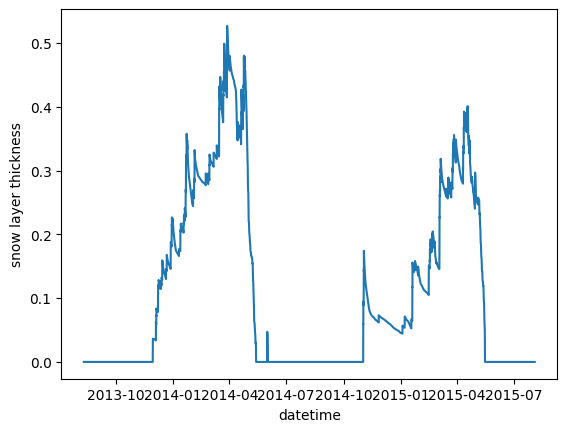

In [152]:
plot_parameters("snow layer thickness")

In [182]:
def plot_physical_components(param):
    data = pd.read_csv(u"../../scripts/Atqasuk/data/atqasuk-atq-2014-2015-meteorology-timeseries-calon.csv", encoding='unicode_escape')
    data.columns = ["date", "time", "Pressure", "Rain", "Temperature", "RH", "Wind Speed", "Gust Speed", "Wind Direction", "Solar Radiation", "Batt"]
    data['DateTime'] = pd.to_datetime(data['date'])

    plt.figure(figsize=(15, 6))  # Set the size of the figure

    sns.lineplot(data=data, x="DateTime", y=param)
    plt.xlabel("Date")  # Set the label for the x-axis
    plt.ylabel(param)  # Set the label for the y-axis

    # Rotate x-axis tick labels for better readability (optional)
    plt.xticks(rotation=25)

    plt.show()  # Display the plot


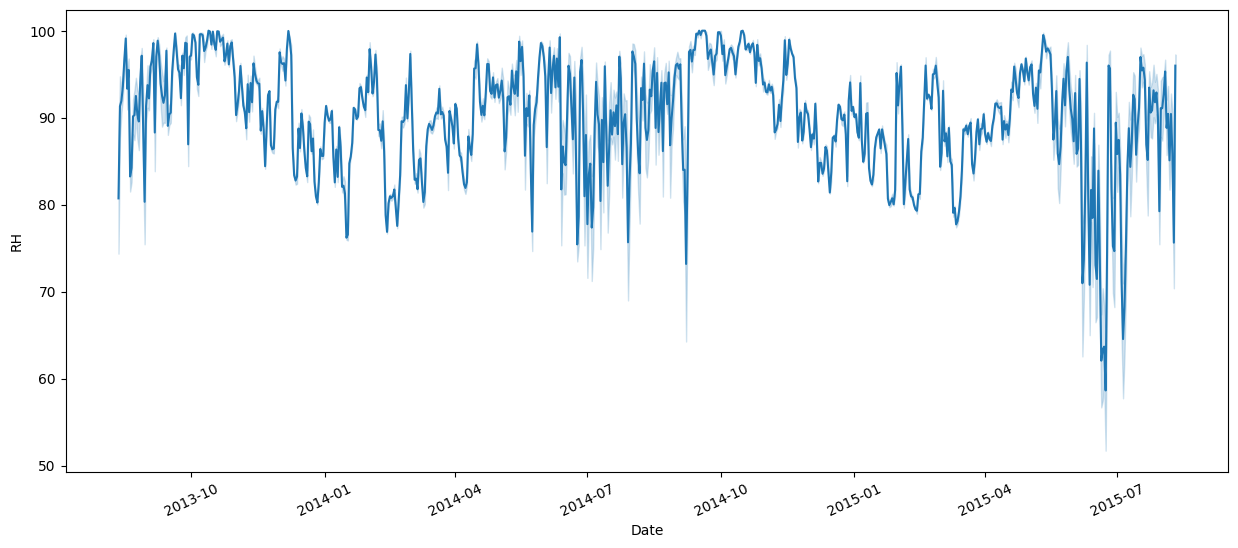

In [183]:
plot_physical_components("RH")

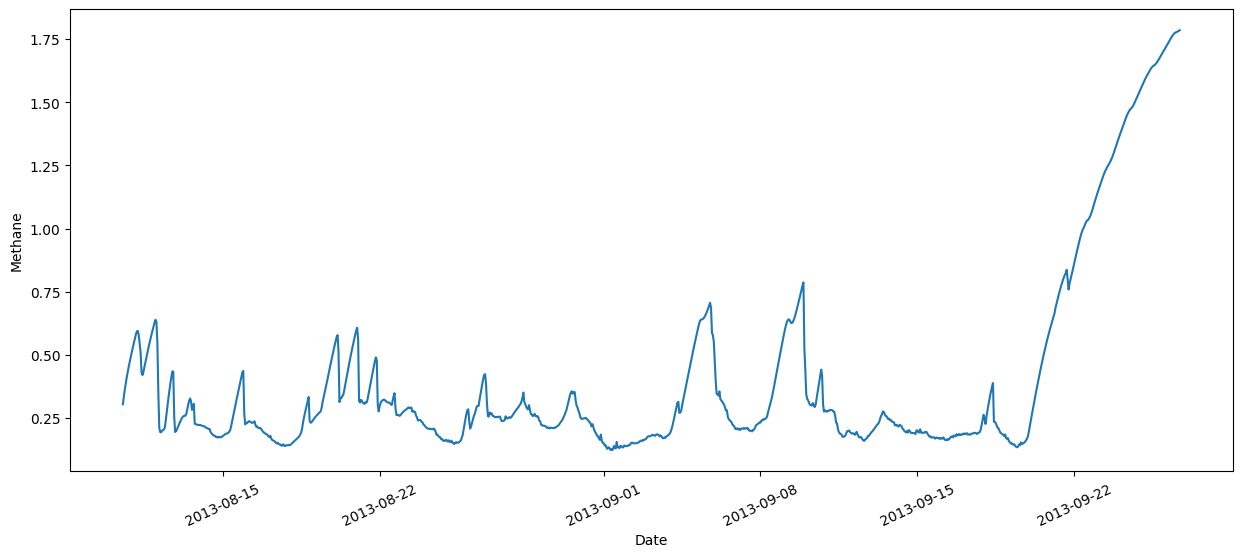

In [225]:
methane_temp = pd.read_csv(u"../../../../methane_water  1  1.dat", encoding='unicode_escape', skiprows=6, delim_whitespace=True, header=None)
methane_temp = methane_temp.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
methane_temp.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.15", "0.30", "0.50", "0.75", "0.90", "1.00", "1.50", "2.00", "2.50"]
methane_temp['datetime'] = pd.to_datetime(dict(year=methane_temp['Year'], month=methane_temp['Month'], day=methane_temp['Day'], hour=methane_temp['Hour']))
methane_temp = methane_temp.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])
methane_temp.head()
plt.figure(figsize=(15, 6))  # Set the size of the figure

sns.lineplot(data=methane_temp, x="datetime", y="1.50")
plt.xlabel("Date")  # Set the label for the x-axis
plt.ylabel("Methane")  # Set the label for the y-axis

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=25)

plt.show()  # Display the plot

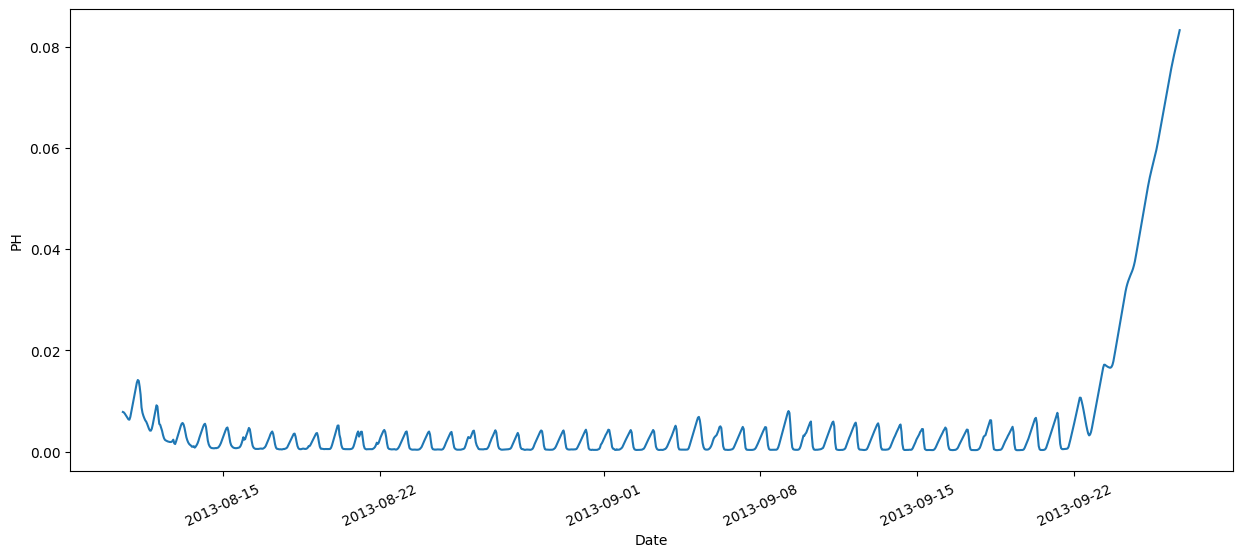

In [226]:
ph_temp = pd.read_csv(u"../../../../phosph_water  1  1.dat", encoding='unicode_escape', skiprows=6, delim_whitespace=True, header=None)
ph_temp = ph_temp.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
ph_temp.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.15", "0.30", "0.50", "0.75", "0.90", "1.00", "1.50", "2.00", "2.50"]
ph_temp['datetime'] = pd.to_datetime(dict(year=ph_temp['Year'], month=ph_temp['Month'], day=ph_temp['Day'], hour=ph_temp['Hour']))
ph_temp = ph_temp.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])

plt.figure(figsize=(15, 6))  # Set the size of the figure

sns.lineplot(data=ph_temp, x="datetime", y="1.50")
plt.xlabel("Date")  # Set the label for the x-axis
plt.ylabel("PH")  # Set the label for the y-axis

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=25)

plt.show()  # Display the plot

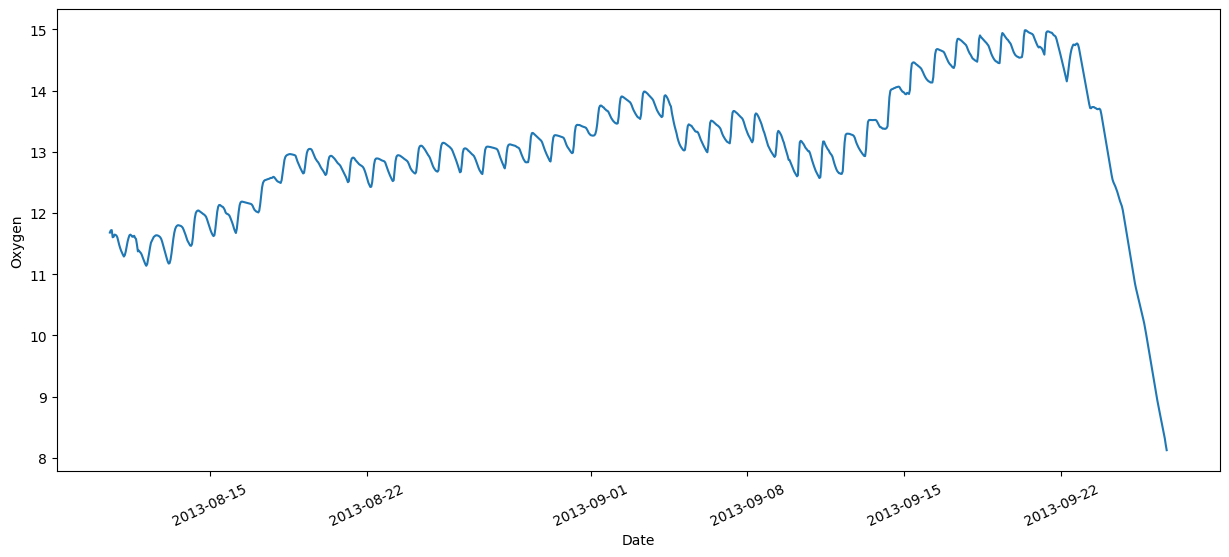

In [232]:
oxygen_temp = pd.read_csv(u"../../../../oxygen_water  1  1.dat", encoding='unicode_escape', skiprows=6, delim_whitespace=True, header=None)
oxygen_temp = oxygen_temp.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
oxygen_temp.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.15", "0.30", "0.50", "0.75", "0.90", "1.00", "1.50", "2.00", "2.50"]
oxygen_temp['datetime'] = pd.to_datetime(dict(year=oxygen_temp['Year'], month=oxygen_temp['Month'], day=oxygen_temp['Day'], hour=oxygen_temp['Hour']))
oxygen_temp = oxygen_temp.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])

plt.figure(figsize=(15, 6))  # Set the size of the figure

sns.lineplot(data=oxygen_temp, x="datetime", y="0.50")
plt.xlabel("Date")  # Set the label for the x-axis
plt.ylabel("Oxygen")  # Set the label for the y-axis

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=25)

plt.show()  # Display the plot

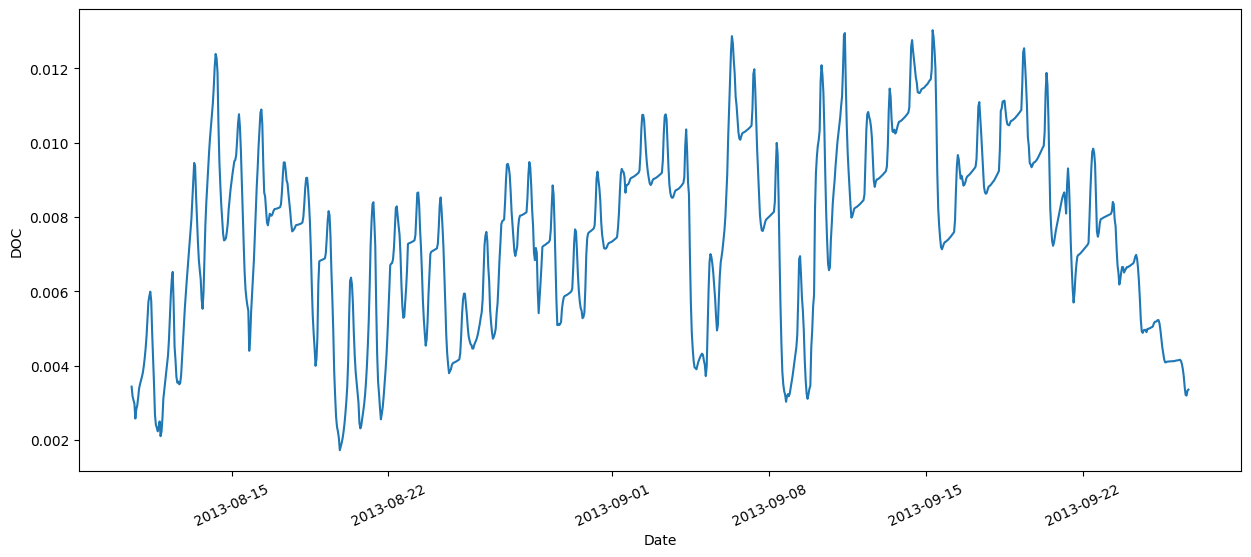

In [237]:
DOC_temp = pd.read_csv(u"../../../../DOC  1  1.dat", encoding='unicode_escape', skiprows=6, delim_whitespace=True, header=None)
DOC_temp = DOC_temp.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
DOC_temp.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.15", "0.30", "0.50", "0.75", "0.90", "1.00", "1.50", "2.00", "2.50"]
DOC_temp['datetime'] = pd.to_datetime(dict(year=DOC_temp['Year'], month=DOC_temp['Month'], day=DOC_temp['Day'], hour=DOC_temp['Hour']))
DOC_temp = DOC_temp.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])

plt.figure(figsize=(15, 6))  # Set the size of the figure

sns.lineplot(data=DOC_temp, x="datetime", y="0.75")
plt.xlabel("Date")  # Set the label for the x-axis
plt.ylabel("DOC")  # Set the label for the y-axis

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=25)

plt.show()  # Display the plot

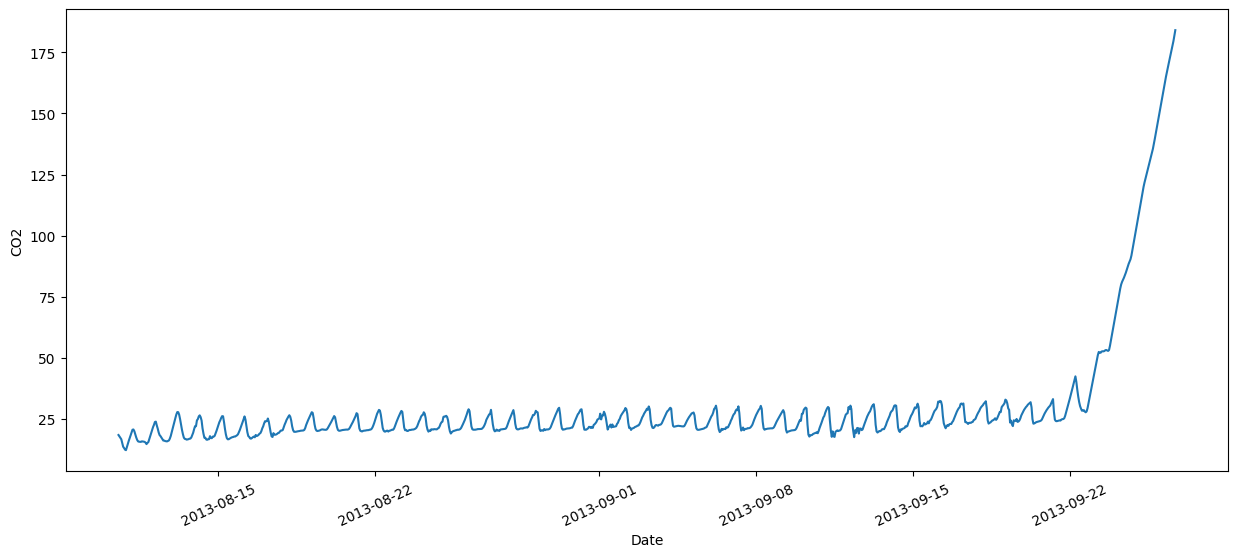

In [245]:
co2_temp = pd.read_csv(u"../../../../co2_water  1  1.dat", encoding='unicode_escape', skiprows=6, delim_whitespace=True, header=None)
co2_temp = co2_temp.drop(columns=[5, 7,9,11,13,15,17,19,21,23])
co2_temp.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.15", "0.30", "0.50", "0.75", "0.90", "1.00", "1.50", "2.00", "2.50"]
co2_temp['datetime'] = pd.to_datetime(dict(year=co2_temp['Year'], month=co2_temp['Month'], day=co2_temp['Day'], hour=co2_temp['Hour']))
co2_temp = co2_temp.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])

plt.figure(figsize=(15, 6))  # Set the size of the figure

sns.lineplot(data=co2_temp, x="datetime", y="0.00")
plt.xlabel("Date")  # Set the label for the x-axis
plt.ylabel("CO2")  # Set the label for the y-axis

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=25)

plt.show()  # Display the plot

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal

def validate(fdir):
    Atgasuk_meas= pd.read_csv(u'../../validation data/Atqasuk_LakeTemp.csv', encoding = "ISO-8859-1")
    Atgasuk_meas['DateTime'] = pd.to_datetime(Atgasuk_meas['DateTime'])
    Atgasuk_calc = pd.read_csv(u"../../model output/Atqasuk/water_temp  1  1.dat", encoding='unicode_escape', skiprows=6, delim_whitespace=True, header=None)
    Atgasuk_calc = Atgasuk_calc.drop(columns=[5, 7, 9, 11, 13, 15, 17, 19, 21, 23])
    Atgasuk_calc.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0 m", "0.15 m", "0.3 m", "0.5 m", "0.75 m", "0.9 m", "1.00 m", "1.5 m", "2.0 m", "2.5 m"]
    Atgasuk_calc['datetime'] = pd.to_datetime(dict(year=Atgasuk_calc['Year'], month=Atgasuk_calc['Month'], day=Atgasuk_calc['Day'], hour=Atgasuk_calc['Hour']))
    Atgasuk_calc = Atgasuk_calc.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])

    df_met = pd.read_csv(u"../../scripts/Atqasuk/data/Atqasuk.dat", encoding='unicode_escape')
    df_met.columns = ["Temp [K]", "Pres [Pa]", "LWdown [W/m2]", "SWdown [W/m2]", "Uspeed [m/s]", "Vspeed [m/s]", "Hum [kg/kg]", "Precip [m/s]"]

    m = np.loadtxt(u"../../model output/Atqasuk/layers  1  1.dat", skiprows=19)
    xlim = len(Atgasuk_meas["Temp_C"])

    fig, axes = plt.subplots(4, 1, figsize=(12, 10))
    fig.suptitle('Atqasuk, hourly', fontsize=16)

    ax1 = axes[0]
    ax2 = axes[1]
    ax3 = axes[2]
    ax4 = axes[3]

    ax1.plot(Atgasuk_meas["Temp_C"])
    ax1.plot(Atgasuk_calc["0.3 m"],alpha=0.75)
    ax1.set_xlim([0,18000])
    ax1.legend(['meas 30cm','calc 30cm'],fontsize=12)
    plt.setp(ax1, ylabel='Temperature [$^oC$]')
    
    ax2.plot(Atgasuk_meas["Temp_C"])
    ax2.plot(Atgasuk_calc["2.5 m"], alpha=0.75)
    ax2.legend(['meas 250cm', 'calc 250cm'], fontsize=12)
    ax2.set_xlim([0, 18000])
    ax2.set_ylabel('Temperature [$^oC$]')

    ax3.plot(m[:, 14], linewidth=2) 
    ax3.plot(m[:, 15], linewidth=2, alpha=0.75)
    ax3.plot(df_met["Precip [m/s]"] * 1e6, alpha=0.5)
    ax3.legend(['ice', 'snow', 'precip*1e6'], fontsize=12)
    ax3.set_xlim([0, 18000])
    ax3.set_ylabel('depth [m]')

    sensor_depth = scipy.signal.savgol_filter(Atgasuk_meas["Depth"], 101, 2, mode='wrap')
    ax4.plot(sensor_depth, linewidth=2)
    ax4.set_xlim([0, 18000])
    ax4.set_ylim([0, 3.5])
    ax4.legend(['sensor depth'], fontsize=12)
    ax4.set_ylabel('depth [m]')
    ax4.set_xlabel('Time [h]')

    plt.show()




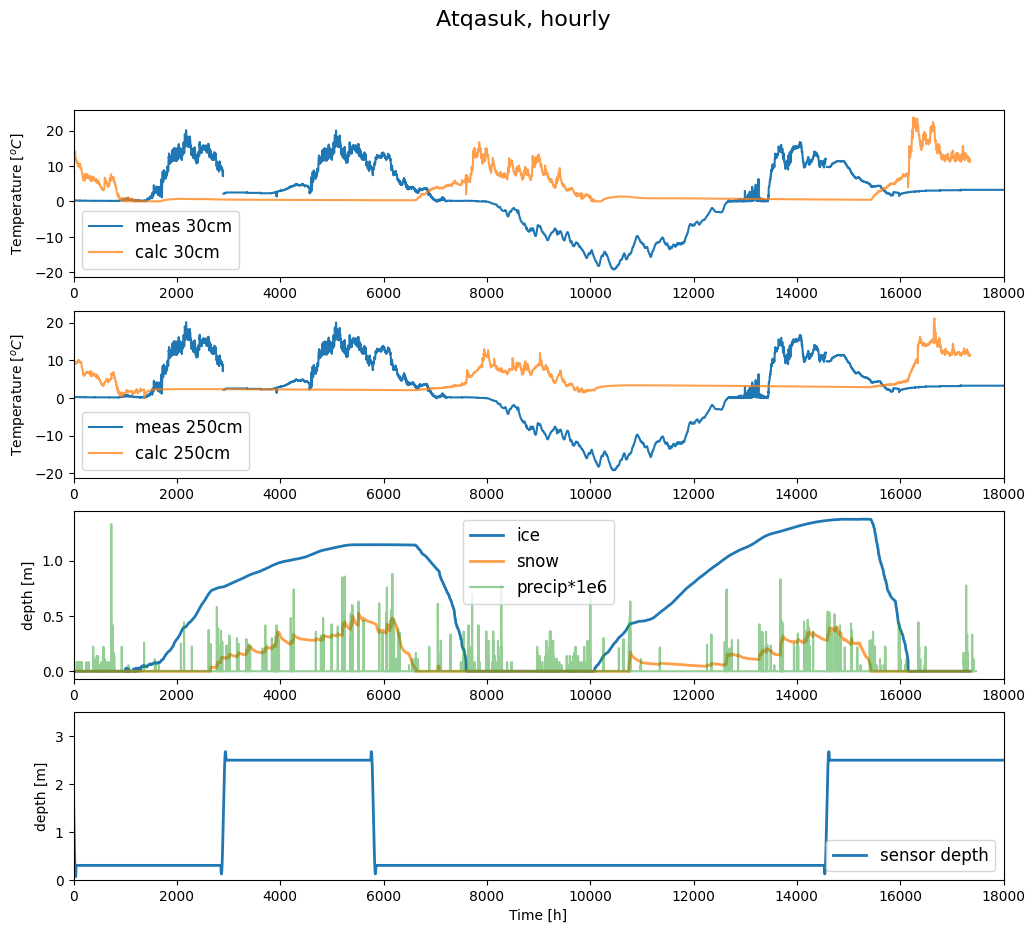

In [162]:
validate("Atgasuk_first")